### Tom wants to sell his car, how much money should he sell the car for? How can we help tom to determine the best price for his car? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns

### DATA ACQUISITION

In [2]:
df = pd.read_csv("imports-85.data", header = None)

In [3]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels",
           "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
           "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", 
           "highway-mpg", "price"]

In [6]:
df.columns = headers

In [7]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [8]:
#Replacing the '?' with null values
df = df.replace('?', np.NaN)

In [9]:
#drop the missing values from the column price
df = df.dropna(subset=["price"], axis=0)

In [10]:
#since we dropped the rows above
df.reset_index(drop=True, inplace=True)

In [11]:
#to get columns
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### BASIC INSIGHTS

In [12]:
df.dtypes #int, float, object, bool, datetime64

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [13]:
#to get a statistical summary
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [14]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164,201,201,201,199,201,201,201,201.000000,...,201.000000,201,197,197,201.000000,199,199,201.000000,201.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,58,22,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,4800,NaN,NaN,6229
freq,NaN,11,32,181,165,113,94,118,198,NaN,...,NaN,92,23,19,NaN,19,36,NaN,NaN,2
mean,0.840796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,NaN,NaN,10.164279,NaN,NaN,25.179104,30.686567,NaN
std,1.254802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,NaN,NaN,4.004965,NaN,NaN,6.423220,6.815150,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [15]:
df[["length", "compression-ratio"]].describe()

,length,compression-ratio
count,201.000000,201.000000
mean,174.200995,10.164279
std,12.322175,4.004965
min,141.100000,7.000000
25%,166.800000,8.600000
50%,173.200000,9.000000
75%,183.500000,9.400000
max,208.100000,23.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

### DATA WRANGLING

#### DATA CLEANING

In [17]:
# Use either notnull() or isnull()
missingdata = df.isnull()
missingdata.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
for column in missingdata.columns.values.tolist():
    print(column)
    print(missingdata[column].value_counts())
    print("")

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
Fa

In [19]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [20]:
#Filling the null values
mean_nl = df["normalized-losses"].astype("float").mean(axis = 0)
mean_nl

122.0

In [21]:
df["normalized-losses"].replace(np.NaN, mean_nl, inplace=True)

In [22]:
mean_bore = df["bore"].astype("float").mean(axis=0)
df["bore"].replace(np.NaN, mean_bore, inplace=True)

In [23]:
mean_stroke = df["stroke"].astype("float").mean(axis=0)
df["stroke"].replace(np.NaN, mean_stroke, inplace=True)

In [24]:
mean_hp = df["horsepower"].astype("float").mean()
df["horsepower"].replace(np.NaN, mean_hp, inplace=True)

In [25]:
mean_peak_rpm = df["peak-rpm"].astype("float").mean()
df["peak-rpm"].replace(np.NaN, mean_peak_rpm, inplace=True)

In [26]:
df["num-of-doors"].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [27]:
df["num-of-doors"].value_counts().idxmax()

'four'

In [28]:
# nod_mode = df["num-of-doors"].mode(0)
df["num-of-doors"].replace(np.NaN, 'four', inplace=True)

In [29]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [30]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [31]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [32]:
df["normalized-losses"] = df["normalized-losses"].astype("int")
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
df["price"] = df["price"].astype("float")

In [33]:
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', 103.39698492462311, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [34]:
df["horsepower"] = df["horsepower"].astype("float")

In [35]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#### DATA STANDARDIZATION

In [36]:
#L/100km = 235 / mpg
# df["city-mpg"] = round((235/df["city-mpg"]),2)
# df["highway-mpg"] = round((235/df["highway-mpg"]),2)

In [37]:
# df.rename(columns={'city-mpg':'city-L/100k', 'highway-mpg':'highway-L/100k'}, inplace=True)

In [38]:
# df[["city-L/100k", "highway-L/100k"]].head(2)

#### DATA NORMALIZATION

In [39]:
#lets normalize length, width, height in range [0,1]
df["length"] = round((df["length"]/df["length"].max()),2)
df["width"] = round((df["width"]/df["width"].max()),2)
df["height"] = round((df["height"]/df["height"].max()),2)

In [40]:
df[["length", "width", "height"]].head(2)

,length,width,height
0,0.81,0.89,0.82
1,0.81,0.89,0.82


#### BINNING

In [41]:
#Binning is a process of transforming "continuous numerical variables" into "discrete categorical 'bins'", for grouped analysis.
#What if we only care about the price difference between cars with high horsepower, medium horsepower, and
#little horsepower (3 types)?

Text(0.5, 1.0, 'horsepower bins')

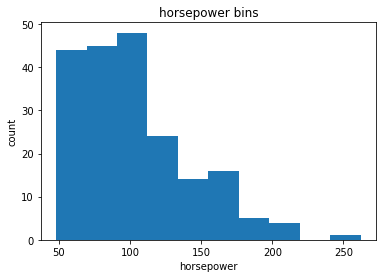

In [42]:
#lets see what the distribution of the horsepower looks like
plt.pyplot.hist(df["horsepower"])
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [43]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [44]:
group_names = ["low", "medium", "high"]

In [45]:
df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels=group_names, include_lowest=True)
df[["horsepower", "horsepower-binned"]].head(3)

,horsepower,horsepower-binned
0,111.0,low
1,111.0,low
2,154.0,medium


In [46]:
df["horsepower-binned"].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

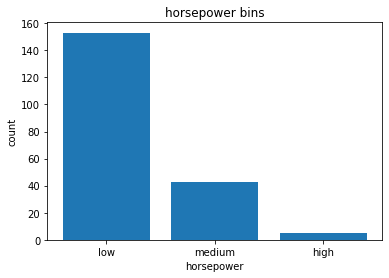

In [47]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

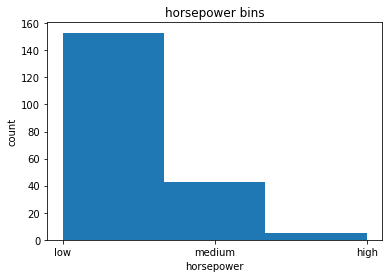

In [48]:
#Alternate
plt.pyplot.hist(df["horsepower-binned"], bins=3)
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

#### INDICATOR VARIABLE (DUMMY)

In [49]:
#An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' 
#because the numbers themselves don't have inherent meaning.

#Why we use indicator variables?
#So we can use categorical variables for regression analysis in the later modules.

# Example
# We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. 
#To use this attribute in regression analysis, we convert "fuel-type" into indicator variables

In [50]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head(2)

,diesel,gas
0,0,1
1,0,1


In [51]:
dummy_variable_1.rename(columns={'diesel':'fuel-type-diesel', 'gas':'fuel-type-gas'}, inplace=True)
dummy_variable_1.head(2)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1


In [52]:
#merge dataframes df & dummy_variable_1
df= pd.concat([df, dummy_variable_1], axis=1)
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,27,13495.0,low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,27,16500.0,low,0,1


In [53]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.head(2)

,std,turbo
0,1,0
1,1,0


In [54]:
dummy_variable_2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'}, inplace=True)
dummy_variable_2.head(2)

,aspiration-std,aspiration-turbo
0,1,0
1,1,0


In [55]:
#merge
df = pd.concat([df, dummy_variable_2], axis=1)
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111.0,5000.0,21,27,13495.0,low,0,1,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111.0,5000.0,21,27,16500.0,low,0,1,1,0


In [56]:
df.to_csv('clean_df.csv')

### EDA

#### Analyzing individual feature pattern using visualization

###### Continuous Numerical Variables(int, float)

In [57]:
#calculate correlation b/w types int & float
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.360695,-0.251580,-0.546310,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075790,0.279719,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.025769,0.094442,-0.364857,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.878008,0.819990,0.595207,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.360233,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.360695,0.025769,0.878008,1.000000,0.847226,0.499429,0.880542,0.679096,0.605963,0.116789,0.162846,0.575009,-0.283865,-0.662782,-0.695286,0.687017,0.214004,-0.214004,-0.236390,0.236390
width,-0.251580,0.094442,0.819990,0.847226,1.000000,0.301632,0.859905,0.727555,0.533159,0.201148,0.195526,0.601694,-0.235019,-0.622164,-0.673036,0.750476,0.251035,-0.251035,-0.316104,0.316104
height,-0.546310,-0.364857,0.595207,0.499429,0.301632,1.000000,0.310994,0.073495,0.190423,-0.078563,0.259685,-0.087388,-0.316770,-0.052900,-0.108325,0.136357,0.282020,-0.282020,-0.097162,0.097162
curb-weight,-0.233118,0.099404,0.782097,0.880542,0.859905,0.310994,1.000000,0.849072,0.644041,0.167412,0.156433,0.757994,-0.279350,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.679096,0.727555,0.073495,0.849072,1.000000,0.572516,0.205806,0.028889,0.822649,-0.256753,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.605963,0.533159,0.190423,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566838,-0.267338,-0.582121,-0.591390,0.543154,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.116789,0.201148,-0.078563,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097815,-0.063720,-0.034079,-0.034741,0.082267,0.241033,-0.241033,-0.218190,0.218190


In [58]:
df[["bore", "stroke", "compression-ratio", "horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566838
stroke,-0.055390,1.000000,0.187854,0.097815
compression-ratio,0.001250,0.187854,1.000000,-0.214431
horsepower,0.566838,0.097815,-0.214431,1.000000


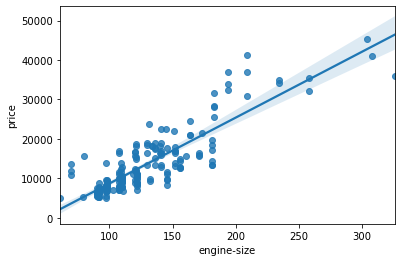

In [59]:
#great way to visualize continuous numerical variables is scatter plot with fitted lines
#Engine-size as potential predictor of price
sns.regplot(x="engine-size", y="price",data=df)
plt.rcParams['figure.figsize']=(5,5)

In [60]:
#Conclusion: As engine size goes up, the price goes up, so this indicates a positive correlation b/w these 2 variables. Engine
#size seems like a good predictor of price since the regression line is almost perfect diagonal

In [61]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

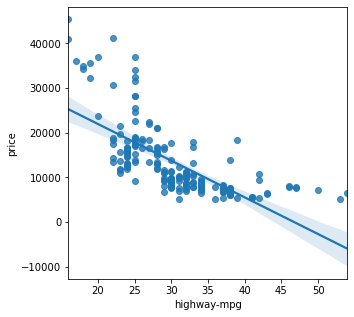

In [62]:
#highway-L/100k as a potential predictor
sns.regplot(x="highway-mpg", y="price", data=df)

In [63]:
#Conclusion: As highway-mpg goes down, the price goes up, so this indicates a negative correlation b/w these 2 variables.
#highway-mpg seems like a good predictor of price since the regression line is almost perfect diagonal

In [64]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<AxesSubplot:xlabel='stroke', ylabel='price'>

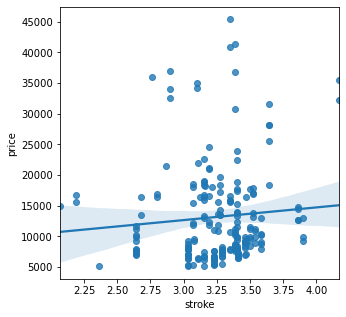

In [65]:
#stroke as a potential predictor
sns.regplot(x="stroke", y="price", data=df)

In [66]:
#stroke does not seem to be a good predictor as the regression line is almost horizontal & the data is very scattered, far from
#the fitted line, which shows a lot of variability. So it is not a reliable variable

In [67]:
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


###### Categorical Variables (object, int)

<AxesSubplot:xlabel='body-style', ylabel='price'>

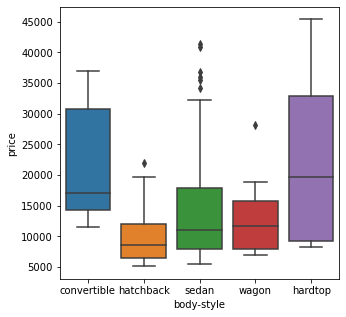

In [68]:
#body-style as potential predictor
sns.boxplot(x="body-style", y="price", data=df)

In [69]:
#Conclusion: the distribution of price between different body-style categories have significant overlap so body-style is not
#a good predictor

<AxesSubplot:xlabel='engine-location', ylabel='price'>

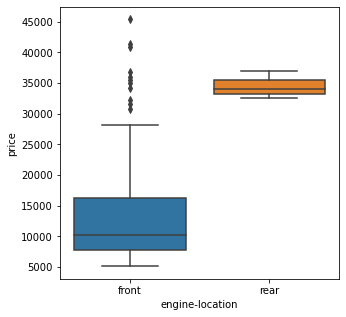

In [70]:
#engine-location as potential predictor
sns.boxplot(x="engine-location", y="price", data=df)

In [71]:
#Conclusion: distribution of price is distinct enough, so it is a good predictor

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

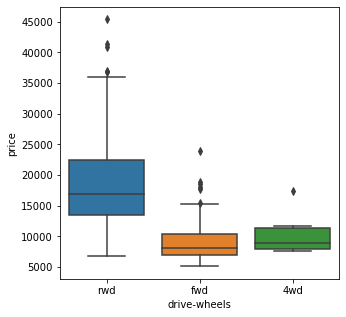

In [72]:
sns.boxplot(x="drive-wheels", y="price", data=df)
#drive-wheels is a good predictor

#### Descriptive Statistical Analysis

In [73]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [74]:
drive_wheels_count = df["drive-wheels"].value_counts().to_frame()
drive_wheels_count.rename(columns={'drive-wheels':'value-counts'}, inplace=True)
drive_wheels_count

,value-counts
fwd,118
rwd,75
4wd,8


In [75]:
drive_wheels_count.index.name='drive-wheels'
drive_wheels_count

,value-counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [76]:
engine_loc_count = df["engine-location"].value_counts().to_frame()
engine_loc_count.rename(columns={'engine-location':'value-counts'},inplace=True)
engine_loc_count.index.name='engine-location'
engine_loc_count

,value-counts
engine-location,
front,198
rear,3


In [77]:
#CONCLUSION: Examining the value counts of the engine location would not be a good predictor variable for the price. This is 
#because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not
#able to draw any conclusions about the engine location.

#### Basics of groups

In [78]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [79]:
group_one = df[["drive-wheels", "price"]]
group_one = group_one.groupby(["drive-wheels"], as_index=False).mean()
group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [80]:
#CONCLUSION: from the above data, the rear drive wheels, on average are the most expensive & 4wd, fwd are approx. same in price

In [81]:
group_two = df[["drive-wheels", "body-style", "price"]]
group_two = group_two.groupby(["drive-wheels", "body-style"], as_index=False).mean()
group_two

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [82]:
grouped_pivot = group_two.pivot(index="drive-wheels", columns="body-style")
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [83]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [84]:
group_three = df[["body-style", "price"]]
group_three = group_three.groupby("body-style", as_index=False).mean()
group_three

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [85]:
#CONCLUSION: hardtop & convertible is most expensive, on average & hatchback is least expensive

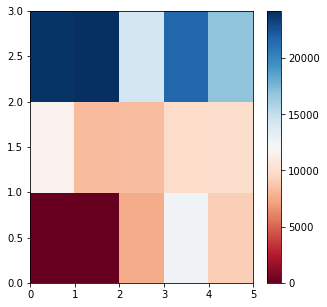

In [86]:
#heatmap represents drive wheels on y axis & body-style on x axis, plots the target variable (price) proportional to colour
import matplotlib.pyplot as plt
plt.pcolor(grouped_pivot, cmap="RdBu")
plt.colorbar()
plt.show()

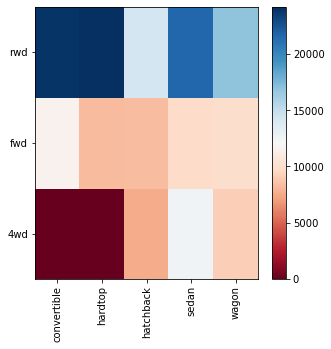

In [87]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap="RdBu")

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

#### Pearson Correlation

In [88]:
"""
Measure the strengths of correlation between the 2 features
-> Correlation coefficient
* closer to 1: strong positive correlation
* closer to -1: strong negative correlation
* close to 0: no correlation
-> P-value
* P < 0.001: Strong 
* P < 0.05: Moderate
* P < 0.1: Weak
* P > 0.1: No relation
"""

'\nMeasure the strengths of correlation between the 2 features\n-> Correlation coefficient\n* closer to 1: strong positive correlation\n* closer to -1: strong negative correlation\n* close to 0: no correlation\n-> P-value\n* P < 0.001: Strong \n* P < 0.05: Moderate\n* P < 0.1: Weak\n* P > 0.1: No relation\n'

In [89]:
from scipy import stats

In [90]:
#Wheel-base vs price
pearson_coef, p_value = stats.pearsonr(df["wheel-base"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655083  with a P-value of P = 8.076488270732873e-20


In [91]:
#Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the 
#linear relationship isn't extremely strong (~0.585)

In [92]:
#Horsepower vs price
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8096811975632288  with a P-value of P = 6.058444649710002e-48


In [93]:
#Since the p-value is  <  0.001, the correlation between Horsepower and price is statistically significant, and the 
#linear relationship is quite strong

In [94]:
#length vs price
pearson_coef, p_value = stats.pearsonr(df["length"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6870172621177876  with a P-value of P = 2.0667444707693827e-29


In [95]:
#Since the p-value is  <  0.001, the correlation between length and price is statistically significant, and the 
#linear relationship is moderately strong

In [96]:
#width vs price
pearson_coef, p_value = stats.pearsonr(df["width"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7504763650061514  with a P-value of P = 1.2067879165763505e-37


In [97]:
#Since the p-value is  <  0.001, the correlation between width and price is statistically significant, and the 
#linear relationship is moderately strong

In [98]:
#curb-weight vs price
pearson_coef, p_value = stats.pearsonr(df["curb-weight"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702847  with a P-value of P = 2.189577238893567e-53


In [99]:
#Since the p-value is  <  0.001, the correlation between curb-weight and price is statistically significant, and the 
#linear relationship is quite strong

In [100]:
#engine-size vs price
pearson_coef, p_value = stats.pearsonr(df["engine-size"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


In [101]:
#Since the p-value is  <  0.001, the correlation between engine-size and price is statistically significant, and the 
#linear relationship is quite strong

In [102]:
#bore vs price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431537659807725  with a P-value of P =   8.051208825441932e-17


In [103]:
#Since the p-value is  <  0.001, the correlation between bore and price is statistically significant, and the 
#linear relationship is not strong

In [104]:
#city-mpg vs price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844683  with a P-value of P =  2.321132065567311e-29


In [105]:
#highway-mpg vs price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589533  with a P-value of P =  1.7495471144474617e-31


In [106]:
#Since the p-value is  <  0.001, the correlation between city-mpg, price and highway-mpg, price is statistically significant, 
#and the linear relationship is negative & moderately strong

#### ANOVA

In [107]:
#statistical method used to test whether there are significant differences between the means of two or more groups
#F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the 
#assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.
#P-value: P-value tells how statistically significant is our calculated score value.
#If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test 
#score and a small p-value.

In [108]:
grouped_test2=df[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(1)

,drive-wheels,price
0,rwd,13495.0
3,fwd,13950.0
4,4wd,17450.0


In [109]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [110]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [111]:
#This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost 
#certain statistical significance. But does this mean all three tested groups are all this highly correlated?

In [112]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [113]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [114]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


#### Conclusion: Importanat variables

In [115]:
"""
Continuous numerical variables:

Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-base
Bore

Categorical variables:

Drive-wheels

"""

'\nContinuous numerical variables:\n\nLength\nWidth\nCurb-weight\nEngine-size\nHorsepower\nCity-mpg\nHighway-mpg\nWheel-base\nBore\n\nCategorical variables:\n\nDrive-wheels\n\n'

### MODEL DEVELOPMENT

#### Simple Linear Regression

In [116]:
# Simple Linear Regression is a method to help us understand the relationship between two variables:

# The predictor/independent variable (X)
# The response/dependent variable (that we want to predict)(Y)
# The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the 
# predictor (independent) variable.

# 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
# a refers to the intercept of the regression line, in other words: the value of Y when X is 0
# b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

In [117]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr

LinearRegression()

In [118]:
X = df[["highway-mpg"]]
Y = df["price"]

In [119]:
lr.fit(X,Y)

LinearRegression()

In [120]:
Yhat = lr.predict(X)
Yhat[0:2]

array([16236.50464347, 16236.50464347])

In [121]:
lr.intercept_

38423.3058581574

In [122]:
lr.coef_

array([-821.73337832])

In [123]:
#Final estimated linear model
# price = 8630795.87 - 280826.09 x highway-mpg

In [124]:
print(df["engine-size"][0:3])
lr2 = LinearRegression()
X = df[["engine-size"]]
Y = df["price"]
lr2.fit(X,Y)
Yhat2 = lr.predict(X)
Yhat2[0:3]

0    130
1    130
2    152
Name: engine-size, dtype: int64


array([-68402.03332369, -68402.03332369, -86480.16764678])

In [125]:
print(lr2.intercept_)
print(lr2.coef_)
# price = -7963.33 + 166.86 * engine-size

-7963.338906281042
[166.86001569]


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

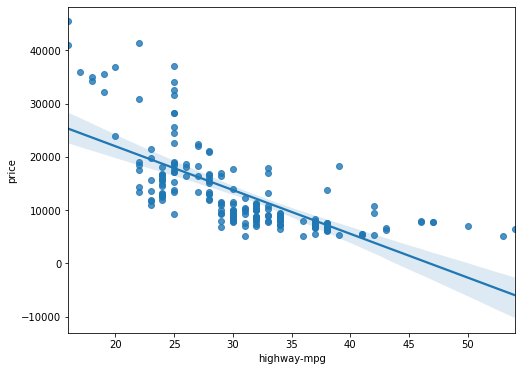

In [126]:
#The regression line is the line of best fit
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)

In [127]:
#OBSERVATION: Look at the scattered data points when looking at regplot, this will give you a good indication of the variance
#of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear 
#model might not be the best model for this data.

(0.0, 47414.1)

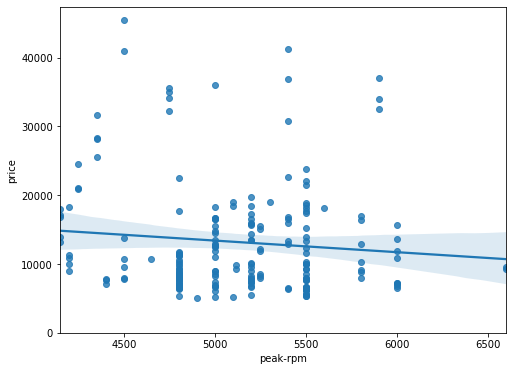

In [128]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [129]:
#The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are
#decreasing or increasing as the "highway-mpg" increases. So the linear model is not the best model for this data

In [130]:
#Residual plot: A good way to visualize the variance
#Variance measures dispersion of the set of data around the mean
#The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e)

In [131]:
# %matplotlib inline 
# %matplotlib notebook

In [132]:
# width = 12
# height = 10
# plt.figure(figsize=(width, height))
# sns.residplot(df['highway-mpg'], df['price'])

#### Multiple Linear Regression

In [133]:
#𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [134]:
lr.fit(Z, df['price'])

LinearRegression()

In [135]:
lr.coef_

array([53.61042729,  4.70886444, 81.47225667, 36.39637823])

In [136]:
lr.intercept_

-15824.038208234444

In [137]:
#Price = -12741.65198710638 + 61.60659398 x horsepower + 3.68312658 x curb-weight + 119.71910924 x engine-size -163.7014319 x highway-mpg

In [138]:
#distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to 
#the distribution of the actual values.

In [139]:
Y_hat = lr.predict(Z)

/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


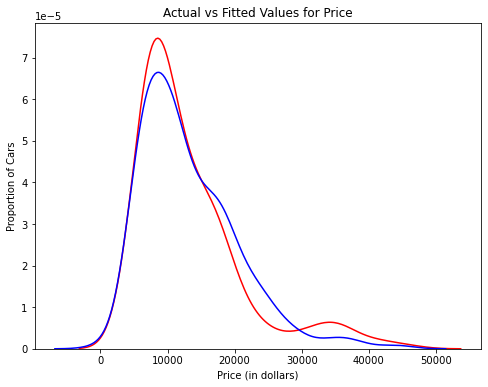

In [140]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#### Polynomial Regression

In [141]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [142]:
x = df["highway-mpg"]
y = df["price"]

In [143]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


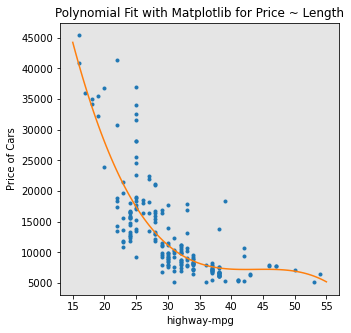

In [144]:
PlotPolly(p, x, y, 'highway-mpg')

In [145]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [146]:
#We can already see from plotting that this polynomial model performs better than the linear model. This is because the
#generated polynomial function "hits" more of the data points.

In [147]:
#11 order
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


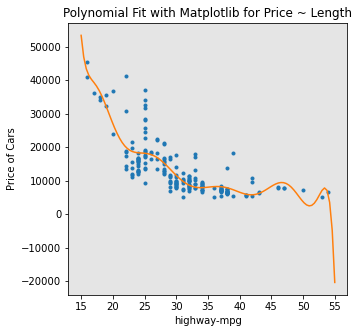

In [148]:
PlotPolly(p1,x,y,'highway-mpg')

#### Multivariate Polynomial Functions

In [149]:
from sklearn.preprocessing import PolynomialFeatures

In [150]:
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [151]:
Z_pr = pr.fit_transform(Z)

In [152]:
Z.shape

(201, 4)

In [153]:
Z_pr.shape

(201, 15)

#### Pipeline

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [155]:
#normalize the data, transform the data & specify the model
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [156]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [157]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [158]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13103.37745014, 13103.37745014, 18228.50045451, 10392.95563313])

In [159]:
#normalize the data & predict the output using Linear Regressinon model
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.00138847, 13699.00138847, 19055.18075089, 10621.20889105,
       15519.94133137, 13868.36830279, 15455.25561838, 15973.23070656,
       17613.77045652, 10722.84396625])

### Measures for in-sample Evaluation

In [160]:
# R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted
#regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by 
#a linear model.

# The Mean Squared Error measures the average of the squares of errors,that is, the difference between actual value (y)
#and the estimated value (ŷ).

#### MODEL 1: SIMPLE LINEAR REGRESSION

In [161]:
X = df[["highway-mpg"]]
Y = df["price"]
lr.fit(X,Y)
print('The r-squared value is: ', lr.score(X,Y))

The r-squared value is:  0.4965911884339176


In [162]:
Y_hat = lr.predict(X)

In [163]:
from sklearn.metrics import mean_squared_error

In [164]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


#### MODEL 2: MULTIPLE LINEAR REGRESSION

In [165]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lr.fit(Z, df["price"])
print('The r-squared value is: ', lr.score(Z,df["price"]))

The r-squared value is:  0.8094130135602673


In [166]:
Y_predict_multi = lr.predict(Z)

In [167]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multi))

The mean square error of price and predicted value using multifit is:  11976801.681229591


#### MODEL 3: POLYNOMIAL FIT

In [168]:
from sklearn.metrics import r2_score

In [169]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [170]:
mean_squared_error(df['price'], p(x))

20474146.426361207

In [171]:
# When comparing models, the model with the higher R-squared value is a better fit for the data
# When comparing models, the model with the smallest MSE value is a better fit for the data.

In [172]:
#Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. 
#This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential 
#predictors of the final car price.

### MODEL EVALUATION

In [173]:
#Functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [174]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

#### PART 1: Training & Testing

In [175]:
y_data = df["price"]

In [176]:
x_data = df.drop('price', axis = 1)

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state=1)

In [179]:
x_test.shape

(21, 30)

In [180]:
x_train.shape

(180, 30)

In [181]:
y_train.shape

(180,)

In [182]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression()

In [183]:
lre.fit(x_train[["horsepower"]], y_train)

LinearRegression()

In [184]:
lre.score(x_test[["horsepower"]], y_test)

0.3634554596325089

In [185]:
lre.score(x_train[["horsepower"]], y_train)

0.6621588065210514

#### Cross validation

In [186]:
# Sometimes you may not have sufficient data, so you may have to perform cross-validation

In [187]:
from sklearn.model_selection import cross_val_score

In [188]:
Rcross = cross_val_score(lre,x_data[["horsepower"]], y_data, cv=4)

In [189]:
Rcross

array([0.7747254 , 0.51722436, 0.74881624, 0.04792707])

In [190]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5221732664777984 and the standard deviation is 0.29158341973020163


In [191]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20244958.23821451, 43740285.03051738, 12491753.70789968,
       17570582.82435501])

In [192]:
from sklearn.model_selection import cross_val_predict

In [193]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14143.6442164 , 14143.6442164 , 20817.63619486, 12746.7621744 ,
       14764.48067952])

#### Overfitting, Underfitting, Model Selection

In [194]:
lr = LinearRegression()

In [195]:
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [196]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [197]:
yhat_train[0:5]

array([ 7425.60111274, 28325.99797859, 14211.26265479,  4053.89965819,
       34499.07600676])

In [198]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [199]:
yhat_test[0:5]

array([11350.45521266,  5884.59029431, 11207.42589659,  6640.92536133,
       15566.43146855])

/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


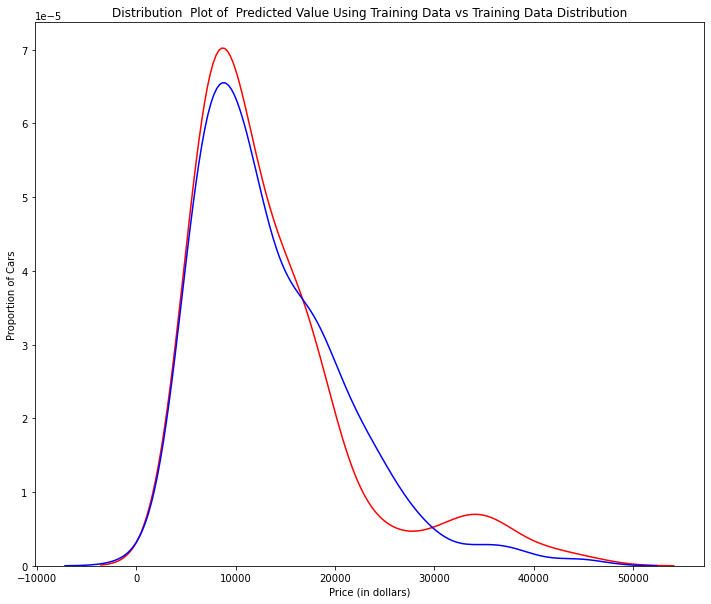

In [200]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


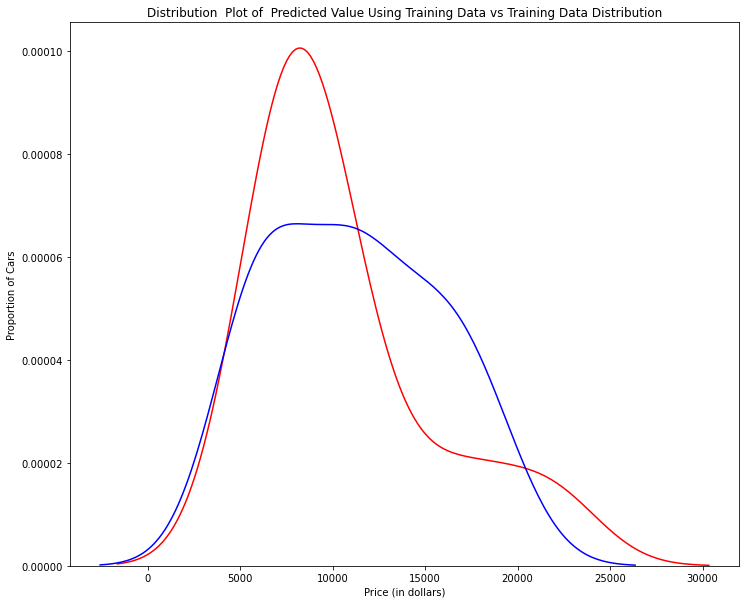

In [201]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [202]:
from sklearn.preprocessing import PolynomialFeatures

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state =1)

In [204]:
pr = PolynomialFeatures(degree=5)

In [205]:
x_train_pr = pr.fit_transform(x_train[["horsepower"]])
x_test_pr = pr.fit_transform(x_test[["horsepower"]])

In [206]:
poly = LinearRegression()

In [207]:
poly.fit(x_train_pr, y_train)

LinearRegression()

In [208]:
yhat = poly.predict(x_test_pr)

In [213]:
yhat[:3]

array([11602.87213457,  7485.83589891,  9626.31321176])

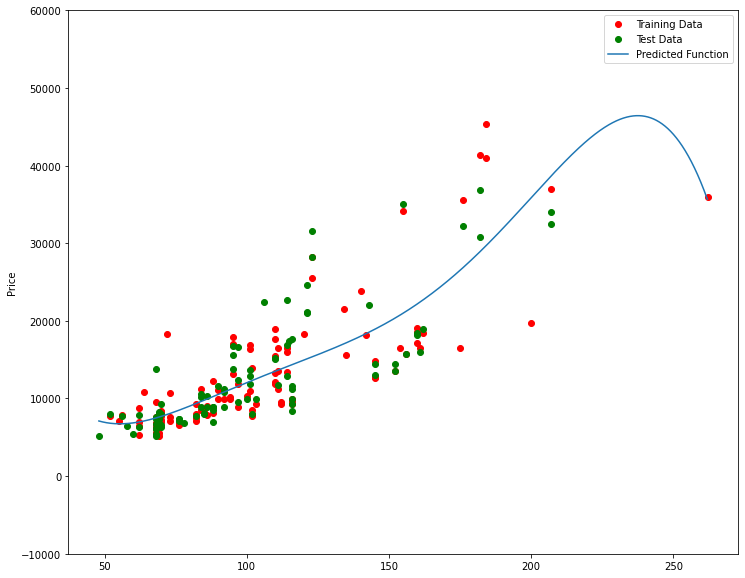

In [214]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [216]:
poly.score(x_train_pr, y_train)

0.6752686157479855

In [217]:
poly.score(x_test_pr, y_test)

0.6683572042971448

Text(3, 0.75, 'Maximum R^2 ')

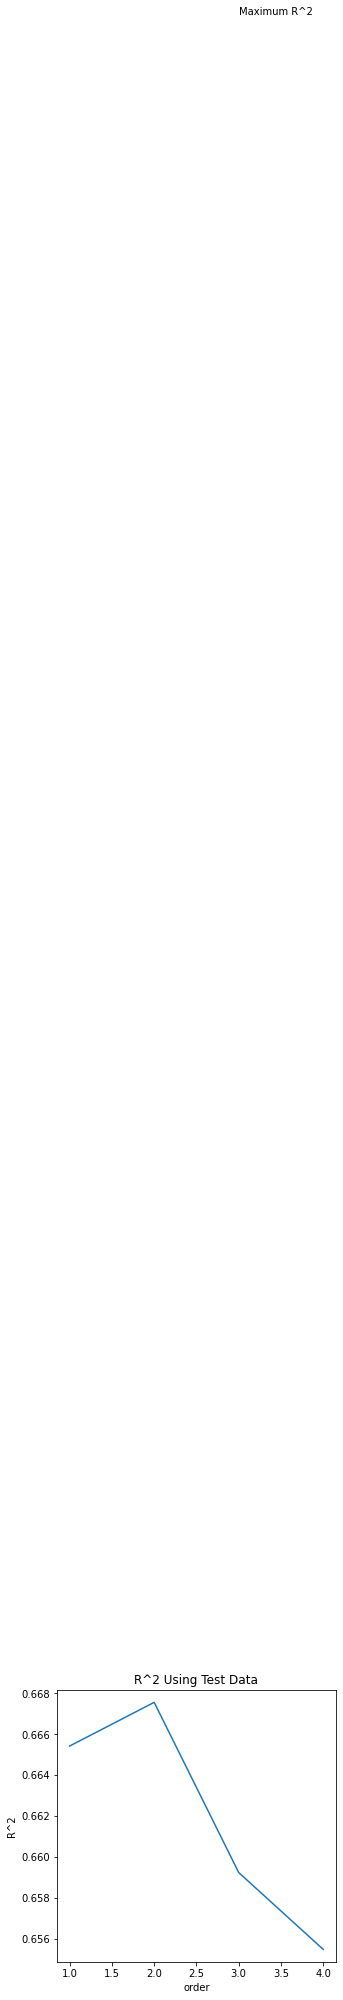

In [218]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

#### Ridge Regression

In [221]:
# Perform a degree 2 polynomial transformation on our data
pr = PolynomialFeatures(degree=2)

In [222]:
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [223]:
from sklearn.linear_model import Ridge

In [224]:
RidgeModel = Ridge(alpha=0.1)

In [225]:
RidgeModel.fit(x_train_pr, y_train)

/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.40677e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

In [226]:
yhat = RidgeModel.predict(x_test_pr)

In [227]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

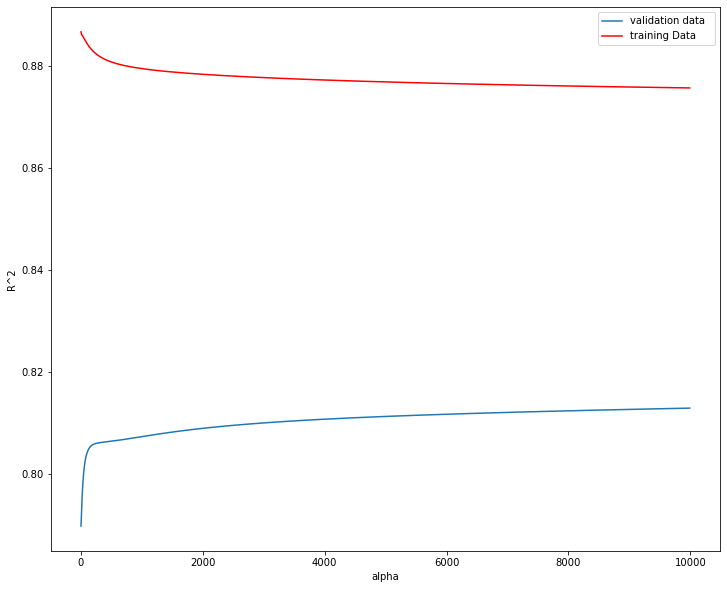

In [228]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

#### Grid Search

In [231]:
from sklearn.model_selection import GridSearchCV

In [232]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [233]:
RR=Ridge()

In [234]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [235]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [236]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [237]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.7765774502844107